## Import Libraries

In [1]:
from glob import glob
from random import randrange
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

## Import Data

In [194]:
#df = pd.read_csv('input_data/goodreads_books.csv') 

In [201]:
files = glob("input_data/goodreads_books_chunk_*.csv")

list_df = []

for filename in files:
    df = pd.read_csv(filename, index_col=None, header=0)
    list_df.append(df)

df = pd.concat(list_df, axis=0, ignore_index=True)

In [3]:
df.head()

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,...,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,630104,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),https://i.gr-assets.com/images/S/compressed.ph...,"Kate Brian, Julian Peploe",https://www.goodreads.com/author/show/94091.Ka...,7597,196,4.03,...,9781416950417,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...
1,9487,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,4179,177,4.35,...,9781595542328,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,..."
2,6050894,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,6288,218,4.23,...,NaN,NaN,"Bloomington, Indiana(United States)",NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...
3,39030,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),https://i.gr-assets.com/images/S/compressed.ph...,"Douglas Preston, Lincoln Child",https://www.goodreads.com/author/show/12577.Do...,38382,1424,4.01,...,9780765354952,NaN,"New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN
4,998,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Thomas J. Stanley, William D. Danko",https://www.goodreads.com/author/show/659.Thom...,72168,3217,4.04,...,9780671015206,NaN,NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...


## Preprocessing

### Generating New Columns

### Step 1: 
Create new column **if book is part of a series (1) or not (0)**. By this, missing values are treated as a valuable information itself (0 = book is not part of a series). 
Assuming the column 'series' is reliably filled.

In [202]:
df.insert(4, 'is_part_of_series', df.series.notna().astype(int))

### Step 2:
Create new column **by how many authors the book was written**. To this end, comma-separated units are counted.

In [203]:
df.insert(7, 'number_of_authors', df.author.str.count(',')+1)

### Step 3:
Create new column for **the book's publication year**.

In [211]:
df.insert(19, 'year_published', pd.to_numeric(df['date_published'].str[-4:], errors = 'coerce'))

### Step 4:
Create new column **if book is an award winning book (1) or not (0).** By this, missing values are treated as a valuable information itself (0 = book is not award winning). Assuming the column 'awards' is reliably filled.

In [212]:
df.insert(28, 'is_award_winning', df.awards.notna().astype(int))

### Step 5:
Create new column for the **number of books in the series**. To this end, comma-separated units are counted.

*Please note that the book at hand is not listed in the column 'books_in_series' (+2).*

In [213]:
df.insert(32, 'number_of_books_in_series', df.books_in_series.str.count(',')+2) #note: the book at hand is not listed in 'books_in_series'

### Step 6:
Inspection of the column 'genre_and_votes' reveals the most voted genre to be listed in the first position.

In [57]:
#inspect a random sample (n=10)
random_int = randrange(start=0, stop=df.shape[0]-10)
print(df.genre_and_votes[random_int:random_int+10])

23596    Sequential Art-Graphic Novels 789, Sequential ...
23597    Religion-Theology 1user, Spirituality 1user, S...
23598    Romance 59, Romance-Contemporary Romance 24, N...
23599                  Historical-Historical Fiction 1user
23600    Mystery 376, Fiction 311, Thriller 308, Cultur...
23601    Fantasy-Paranormal 2, Romance-M M Romance 1use...
23602                                          Adventure 3
23603               Romance 14, New Adult 9, Young Adult 7
23604    Historical-Historical Fiction 234, Young Adult...
23605    Mystery 645, Fiction 496, Thriller 318, Thrill...
Name: genre_and_votes, dtype: object


Create two new columns for **the book's genre mix** and for **the book's main genre** according to readers' votes. To this end, the numerical votes are removed **(genre mix)** and the first comma-separated unit is extracted **(main genre)**.

In [214]:
df.insert(22, 'genre_mix', df.genre_and_votes.replace(to_replace=' [0-9]+', value='', regex=True))
df.insert(23, 'main_genre', df.genre_mix.str.split(',').str[0])

### Removing Columns

In [215]:
df.drop('id', inplace=True, axis=1)

## Data Analysis

In [216]:
print('The preprocessed dataset contains {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The preprocessed dataset contains 52199 rows and 37 columns.


In [217]:
print('Overview of all numerical columns in the dataset:')
df.describe()

Overview of all numerical columns in the dataset:


,is_part_of_series,number_of_authors,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,year_published,is_award_winning,number_of_books_in_series
count,52199.000000,52199.000000,5.219900e+04,52199.000000,52199.000000,5.219900e+04,5.219900e+04,52199.000000,52199.000000,52199.000000,49869.000000,51332.000000,52199.000000,22078.000000
mean,0.446733,1.342957,1.887361e+04,1012.980881,4.020610,7.817176e+03,6.250785e+03,3456.512424,935.496600,413.640051,328.942730,1988.057508,0.203567,6.082933
std,0.497159,1.409807,1.163978e+05,4054.802421,0.367161,5.876373e+04,3.473533e+04,18249.298631,5890.077215,3843.356500,252.790119,121.983274,0.402655,3.338582
min,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-850.000000,0.000000,2.000000
25%,0.000000,1.000000,3.400000e+02,31.000000,3.820000,1.170000e+02,1.090000e+02,63.000000,15.000000,6.000000,210.000000,1993.000000,0.000000,3.000000
50%,0.000000,1.000000,2.295000e+03,163.000000,4.030000,8.100000e+02,7.650000e+02,452.000000,107.000000,36.000000,304.000000,2007.000000,0.000000,5.000000
75%,1.000000,1.000000,9.297500e+03,622.000000,4.230000,3.375500e+03,3.190500e+03,1866.000000,450.000000,151.000000,392.000000,2012.000000,0.000000,10.000000
max,1.000000,52.000000,6.801077e+06,169511.000000,5.000000,4.414877e+06,1.868421e+06,980183.000000,529060.000000,537793.000000,14777.000000,2021.000000,1.000000,11.000000


### Overview of Missing Values

In [281]:
cols_wo_missing_vals = list(df.columns[df.isnull().sum()/df.shape[0] == 0])
cols_w_missing_vals = list(df.columns[df.isnull().sum()/df.shape[0] > 0])

In [282]:
print('List of columns without missing values: {}'.format(cols_wo_missing_vals))

List of columns without missing values: ['title', 'link', 'is_part_of_series', 'author', 'number_of_authors', 'author_link', 'rating_count', 'review_count', 'average_rating', 'five_star_ratings', 'four_star_ratings', 'three_star_ratings', 'two_star_ratings', 'one_star_ratings', 'is_award_winning', 'amazon_redirect_link']


In [285]:
cols_missing_vals_share = df[cols_w_missing_vals].isnull().sum()/df.shape[0]
pd.options.display.max_rows = 25
print(cols_missing_vals_share.sort_values(ascending = False))

asin                         0.899692
awards                       0.796433
settings                     0.779402
characters                   0.737639
number_of_books_in_series    0.577042
books_in_series              0.577042
series                       0.553267
original_title               0.248070
isbn13                       0.243146
isbn                         0.227648
recommended_books            0.076515
worldcat_redirect_link       0.076342
publisher                    0.069657
genre_and_votes              0.054407
main_genre                   0.054407
genre_mix                    0.054407
description                  0.049330
number_of_pages              0.044637
year_published               0.016610
date_published               0.016475
cover_link                   0.011629
dtype: float64


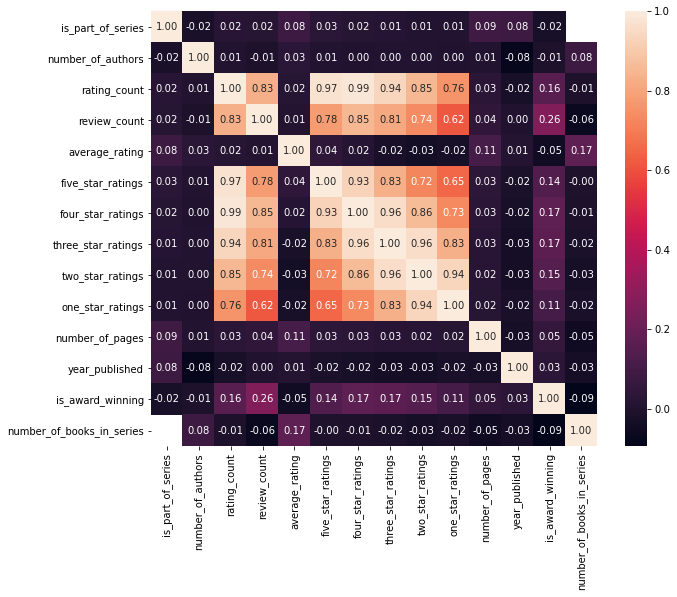

In [218]:
correlation_matrix = df.corr()

plt.rcParams['figure.figsize'] = (10,8)
sn.heatmap(correlation_matrix, annot = True, fmt = '.2f')
plt.show()

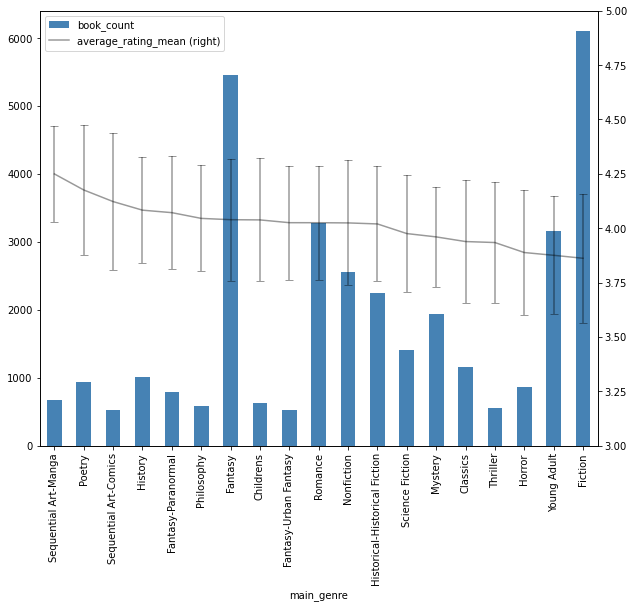

In [289]:
df_top_genres = df.groupby('main_genre').filter(lambda x: len(x) >= 500)
df_count = df_top_genres[['main_genre','average_rating']].groupby('main_genre').count().rename(columns={'average_rating': 'book_count'})
df_mean = df_top_genres[['main_genre','average_rating']].groupby('main_genre').mean().rename(columns={'average_rating': 'average_rating_mean'})
df_std = df_top_genres[['main_genre','average_rating']].groupby('main_genre').std().rename(columns={'average_rating': 'average_rating_std'})
df_joined_1 = df_count.join(df_mean)
df_joined = df_joined_1.join(df_std).sort_values('average_rating_mean', ascending = False)

fig, ax = plt.subplots()
df_joined.plot(ax=ax, y='book_count', kind='bar', color='steelblue')
# same ax as above - automatically added on the right
df_joined.plot(ax=ax,
               y='average_rating_mean',
               secondary_y=True,
               yerr='average_rating_std',
               color='black',
               alpha=0.4,
               capsize=4)
ax.tick_params(axis='x',labelrotation=90)
ax.right_ax.set_ylim(3,5)
plt.show()

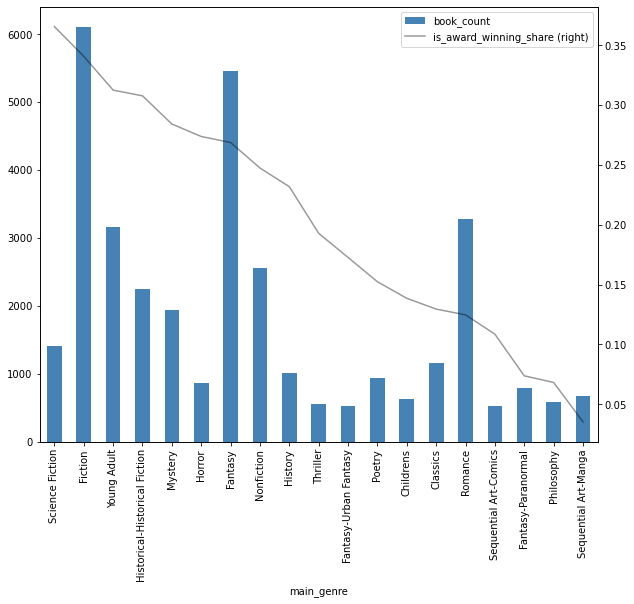

In [304]:
df_top_genres = df.groupby('main_genre').filter(lambda x: len(x) >= 500)
df_count = df_top_genres[['main_genre','is_award_winning']].groupby('main_genre').count().rename(columns={'is_award_winning': 'book_count'})
df_sum = df_top_genres[['main_genre','is_award_winning']].groupby('main_genre').sum().rename(columns={'is_award_winning': 'is_award_winning_sum'})
df_joined = df_count.join(df_sum).sort_values('is_award_winning_sum', ascending = False)
df_joined['is_award_winning_share'] = df_joined['is_award_winning_sum']/df_joined['book_count']
df_joined = df_joined.sort_values('is_award_winning_share', ascending = False)

fig, ax = plt.subplots()
df_joined.plot(ax=ax, y='book_count', kind='bar', color='steelblue')
# same ax as above - automatically added on the right
df_joined.plot(ax=ax,
               y='is_award_winning_share',
               secondary_y=True,
               color='black',
               alpha=0.4)
ax.tick_params(axis='x',labelrotation=90)
plt.show()

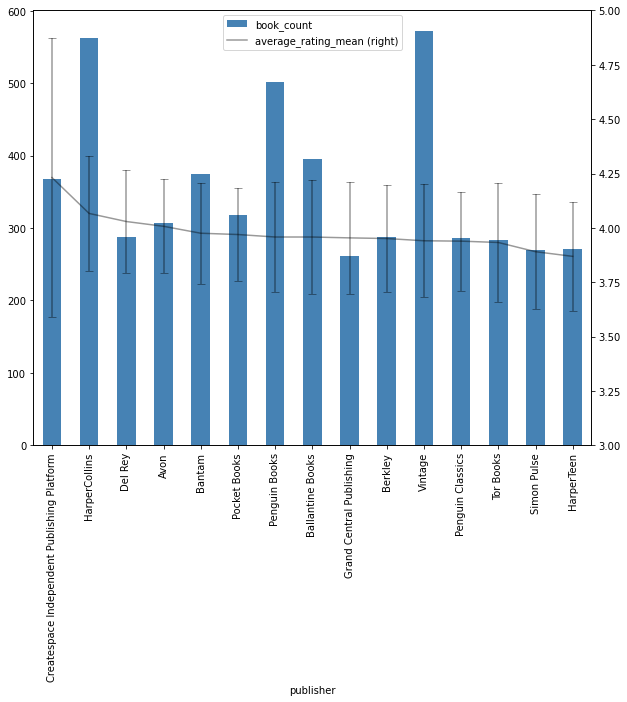

In [297]:
df_top_publishers = df.groupby('publisher').filter(lambda x: len(x) >= 250)
df_count = df_top_publishers[['publisher','average_rating']].groupby('publisher').count().rename(columns={'average_rating': 'book_count'})
df_mean = df_top_publishers[['publisher','average_rating']].groupby('publisher').mean().rename(columns={'average_rating': 'average_rating_mean'})
df_std = df_top_publishers[['publisher','average_rating']].groupby('publisher').std().rename(columns={'average_rating': 'average_rating_std'})
df_joined_1 = df_count.join(df_mean)
df_joined = df_joined_1.join(df_std).sort_values('average_rating_mean', ascending = False)

fig, ax = plt.subplots()
df_joined.plot(ax=ax, y='book_count', kind='bar', color='steelblue')
# same ax as above - automatically added on the right
df_joined.plot(ax=ax,
               y='average_rating_mean',
               secondary_y=True,
               yerr='average_rating_std',
               color='black',
               alpha=0.4,
               capsize=4)
ax.tick_params(axis='x',labelrotation=90)
ax.right_ax.set_ylim(3,5)
plt.show()

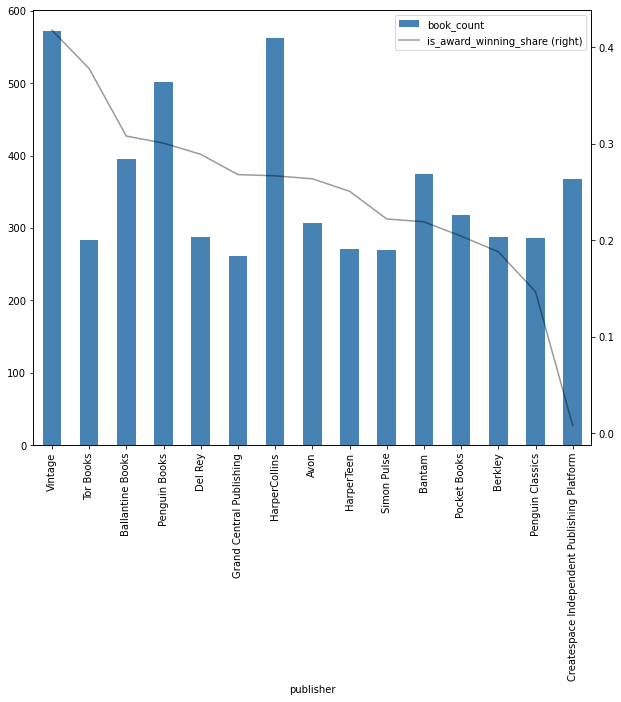

In [305]:
df_top_publisher = df.groupby('publisher').filter(lambda x: len(x) >= 250)
df_count = df_top_publisher[['publisher','is_award_winning']].groupby('publisher').count().rename(columns={'is_award_winning': 'book_count'})
df_sum = df_top_publisher[['publisher','is_award_winning']].groupby('publisher').sum().rename(columns={'is_award_winning': 'is_award_winning_sum'})
df_joined = df_count.join(df_sum)
df_joined['is_award_winning_share'] = df_joined['is_award_winning_sum']/df_joined['book_count']
df_joined = df_joined.sort_values('is_award_winning_share', ascending = False)

fig, ax = plt.subplots()
df_joined.plot(ax=ax, y='book_count', kind='bar', color='steelblue')
# same ax as above - automatically added on the right
df_joined.plot(ax=ax,
               y='is_award_winning_share',
               secondary_y=True,
               color='black',
               alpha=0.4)
ax.tick_params(axis='x',labelrotation=90)
plt.show()